IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

PROCESAMIENTO DE DATOS

In [2]:
datos = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = datos['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datos = pd.concat( [ datos,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datos['Sueldo'] = datos['Sueldo'].str.extract('(\d+)', expand=False).astype(float)
datos['Sueldo'] = datos['Sueldo']*1000
datos.head()

datos = datos.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición', 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)

In [3]:
x_Autor = np.asanyarray(datos.drop(columns=['Valoracion']))

y_Autor=datos['Valoracion']

print(x_Autor.shape)
print(y_Autor.shape)

(3191, 47)
(3191,)


SEPARACIÓN DEL DATSET Y ESCALAMIENTO DE DATOS

In [4]:
#https://medium.com/analytics-vidhya/what-is-random-state-in-machine-learning-84c1c9dffaad
x_trainAutor, x_testAutor, y_trainAutor, y_testAutor = train_test_split(x_Autor,y_Autor,test_size=0.2, random_state=3)
x_trainAutor, x_valAutor, y_trainAutor, y_valAutor = train_test_split(x_trainAutor, y_trainAutor, 
                                                                test_size=0.25, random_state=3)

In [5]:
#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
x_trainAutor = scaler.fit_transform(x_trainAutor)
x_testAutor = scaler.fit_transform(x_testAutor)

CONSTRUCCIÓN DEL MODELO

In [6]:
modelo_autor = keras.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(47,)),
    keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.1,
momentum=0.5)

modelo_autor.compile(optimizer = sgd,
               loss='mse',
               metrics=['mae'])

In [7]:
#https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
history_autor = modelo_autor.fit(x_trainAutor, y_trainAutor, epochs= 300, batch_size= 32,
                                            validation_data= (x_testAutor, y_testAutor))

Epoch 1/300
60/60 [==============================] - 2s 6ms/step - loss: 111.9421 - mae: 6.9436 - val_loss: 44.9674 - val_mae: 5.2102
Epoch 2/300
60/60 [==============================] - 0s 2ms/step - loss: 34.8288 - mae: 4.6826 - val_loss: 38.1121 - val_mae: 4.7231
Epoch 3/300
60/60 [==============================] - 0s 2ms/step - loss: 33.9491 - mae: 4.5756 - val_loss: 36.6852 - val_mae: 4.6456
Epoch 4/300
60/60 [==============================] - 0s 2ms/step - loss: 32.4628 - mae: 4.4674 - val_loss: 45.7403 - val_mae: 5.3472
Epoch 5/300
60/60 [==============================] - 0s 2ms/step - loss: 31.8627 - mae: 4.4612 - val_loss: 34.4335 - val_mae: 4.5181
Epoch 6/300
60/60 [==============================] - 0s 2ms/step - loss: 29.4967 - mae: 4.2429 - val_loss: 37.0786 - val_mae: 4.6882
Epoch 7/300
60/60 [==============================] - 0s 2ms/step - loss: 32.2223 - mae: 4.4219 - val_loss: 39.6355 - val_mae: 4.7607
Epoch 8/300
60/60 [==============================] - 0s 2ms/step - l

VISUALIZACIÓN DE MÉTRICAS

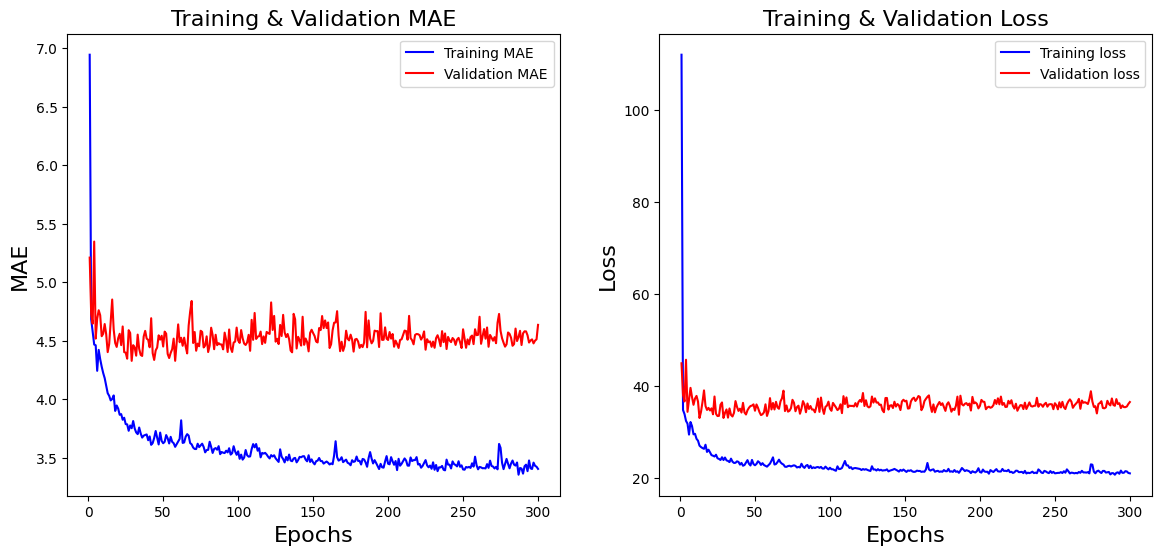

In [10]:
import matplotlib.pyplot as plt
 
history_dict2 = history_autor.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
accuracy2 = history_dict2['mae']
val_accuracy2 = history_dict2['val_mae']
 
epochs2 = range(1, len(loss_values2) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs2, accuracy2, 'b', label='Training MAE')
ax[0].plot(epochs2, val_accuracy2, 'r', label='Validation MAE')
ax[0].set_title('Training & Validation MAE', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('MAE', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs2, loss_values2, 'b', label='Training loss')
ax[1].plot(epochs2, val_loss_values2, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

R CUADRADO AJUSTADO

In [12]:
from sklearn.metrics import r2_score
y_train_pred = modelo_autor.predict(x_trainAutor)
y_test_pred = modelo_autor.predict(x_testAutor)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_trainAutor, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_testAutor, y_test_pred)))

20/20 [==============================] - 0s 924us/step
The R2 score on the Train set is:	0.941
The R2 score on the Test set is:	0.898
